In [1]:
from sklearn.metrics import roc_auc_score

In [2]:
import pickle

In [3]:
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('data_sample_500.csv')
data

terms  ...  osman
0    Securities Act of 1933  ...  26.91
1                  DROPDOWN  ...  35.51
2         Economic Exposure  ...  27.36
3                  Quartile  ...  89.01
4           Josef Ackermann  ...  66.29
..                      ...  ...    ...
495         Bilateral Trade  ...  35.18
496        Exchanges (noun)  ...  27.63
497    GROUP LIFE ASSURANCE  ...  65.87
498     Average Cost Method  ...  56.46
499    Certainty Equivalent  ...  47.11

[500 rows x 20 columns]

In [6]:
data['assigned_readibility'].value_counts(normalize = True)

1    0.55
0    0.45
Name: assigned_readibility, dtype: float64

In [7]:
data['assigned_readibility'].value_counts()

1    275
0    225
Name: assigned_readibility, dtype: int64

In [9]:
data[data['assigned_readibility']==1]['difficult_words'].mean()

13.421818181818182

In [10]:
data[data['assigned_readibility']==1]['difficult_words'].median()

13.0

In [11]:
data[data['assigned_readibility']==1]['difficult_words'].mode()

0    15
dtype: int64

In [12]:
data[data['assigned_readibility']==0]['difficult_words'].mean()

8.013333333333334

In [13]:
data[data['assigned_readibility']==0]['difficult_words'].median()

7.0

In [14]:
data[data['assigned_readibility']==0]['difficult_words'].mode()

0    3
dtype: int64

In [15]:
data[['source', 'assigned_readibility']].value_counts().reset_index()

source  assigned_readibility    0
0          investopedia                     1  182
1              palgrave                     0  119
2            9_12_louis                     1   30
3   non_educators_louis                     0   26
4                  opod                     0   24
5         college_louis                     0   22
6             economist                     1   21
7             6_8_louis                     1   18
8                   zvi                     0   17
9                   fmi                     0   13
10                  sam                     1   12
11                 prin                     0    4
12            pre_louis                     1    4
13                ncert                     1    4
14        ncert_keec111                     1    2
15   ncert_class12_econ                     1    2

In [16]:
data.columns

Index(['terms', 'definitions', 'source', 'assigned_readibility',
       'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog', 'text_standard',
       'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford',
       'gulpease_index', 'osman'],
      dtype='object')

In [17]:
numeric_columns = ['assigned_readibility',
       'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog',
       'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford',
       'gulpease_index', 'osman']

In [18]:
pearson_corr = data[numeric_columns].corr(method='pearson')
pearson_corr

assigned_readibility  ...     osman
assigned_readibility                      1.000000  ... -0.125110
flesch_reading_ease                      -0.043257  ...  0.808320
flesch_kincaid_grade                      0.150313  ... -0.812153
smog_index                                0.302889  ... -0.159283
coleman_liau_index                        0.078112  ... -0.938243
automated_readability_index               0.185995  ... -0.897901
dale_chall_readability_score             -0.102067  ... -0.553413
difficult_words                           0.367205  ... -0.457720
linsear_write_formula                     0.222194  ... -0.501392
gunning_fog                               0.105621  ... -0.683378
fernandez_huerta                         -0.075824  ...  0.832279
szigriszt_pazos                          -0.073572  ...  0.835070
gutierrez_polini                         -0.089157  ...  0.974459
crawford                                  0.110774  ... -0.674592
gulpease_index                           -0.153827  ...  0.432211
osman                                    -0.125110  ...  1.000000

[16 rows x 16 columns]

In [19]:
kendall_corr = data[numeric_columns].corr(method='kendall')
kendall_corr

assigned_readibility  ...     osman
assigned_readibility                      1.000000  ... -0.105681
flesch_reading_ease                      -0.036325  ...  0.630356
flesch_kincaid_grade                      0.135347  ... -0.605873
smog_index                                0.281984  ... -0.162664
coleman_liau_index                        0.071543  ... -0.798352
automated_readability_index               0.166061  ... -0.728394
dale_chall_readability_score             -0.099751  ... -0.401586
difficult_words                           0.311003  ... -0.396435
linsear_write_formula                     0.203269  ... -0.388578
gunning_fog                               0.091743  ... -0.521884
fernandez_huerta                         -0.066509  ...  0.647090
szigriszt_pazos                          -0.063214  ...  0.657054
gutierrez_polini                         -0.074275  ...  0.906113
crawford                                  0.098818  ... -0.620527
gulpease_index                           -0.195007  ...  0.696278
osman                                    -0.105681  ...  1.000000

[16 rows x 16 columns]

In [20]:
spearman_corr = data[numeric_columns].corr(method='spearman')
spearman_corr

assigned_readibility  ...     osman
assigned_readibility                      1.000000  ... -0.129277
flesch_reading_ease                      -0.044397  ...  0.808718
flesch_kincaid_grade                      0.164739  ... -0.790429
smog_index                                0.303174  ... -0.191061
coleman_liau_index                        0.087457  ... -0.931728
automated_readability_index               0.202497  ... -0.899401
dale_chall_readability_score             -0.121857  ... -0.553668
difficult_words                           0.372737  ... -0.542175
linsear_write_formula                     0.247400  ... -0.528003
gunning_fog                               0.112080  ... -0.703089
fernandez_huerta                         -0.081274  ...  0.825285
szigriszt_pazos                          -0.077305  ...  0.832581
gutierrez_polini                         -0.090841  ...  0.978683
crawford                                  0.119407  ... -0.789302
gulpease_index                           -0.238474  ...  0.806723
osman                                    -0.129277  ...  1.000000

[16 rows x 16 columns]

In [21]:
#NON-LINEAR CORRELATION
#phik
#mic (packge minepy) - maximal information 

In [22]:
!pip install phik

     |████████████████████████████████| 675 kB 5.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [23]:
import phik
from phik import resources, report

In [24]:
data[numeric_columns].phik_matrix()

interval columns not set, guessing: ['assigned_readibility', 'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index', 'coleman_liau_index', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula', 'gunning_fog', 'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford', 'gulpease_index', 'osman']


assigned_readibility  ...     osman
assigned_readibility                      1.000000  ...  0.173316
flesch_reading_ease                       0.000000  ...  0.892146
flesch_kincaid_grade                      0.160109  ...  0.862325
smog_index                                0.383352  ...  0.417154
coleman_liau_index                        0.133526  ...  0.934164
automated_readability_index               0.275697  ...  0.878711
dale_chall_readability_score              0.215652  ...  0.639406
difficult_words                           0.469471  ...  0.402804
linsear_write_formula                     0.385076  ...  0.522121
gunning_fog                               0.259071  ...  0.739938
fernandez_huerta                          0.159071  ...  0.941636
szigriszt_pazos                           0.147178  ...  0.939153
gutierrez_polini                          0.056996  ...  0.945416
crawford                                  0.241805  ...  0.850964
gulpease_index                            0.313646  ...  0.813556
osman                                     0.173316  ...  1.000000

[16 rows x 16 columns]

In [25]:
data[numeric_columns].global_phik()

interval columns not set, guessing: ['assigned_readibility', 'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index', 'coleman_liau_index', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula', 'gunning_fog', 'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford', 'gulpease_index', 'osman']


(array([[1.02631188],
        [1.0039991 ],
        [1.0024049 ],
        [1.00653494],
        [1.00657928],
        [0.94731973],
        [1.00310143],
        [1.03477743],
        [1.0039799 ],
        [1.01399122],
        [0.9928532 ],
        [1.00024432],
        [1.04765573],
        [1.00614114],
        [1.11227339],
        [1.00151107]]), array(['assigned_readibility', 'flesch_reading_ease',
        'flesch_kincaid_grade', 'smog_index', 'coleman_liau_index',
        'automated_readability_index', 'dale_chall_readability_score',
        'difficult_words', 'linsear_write_formula', 'gunning_fog',
        'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini',
        'crawford', 'gulpease_index', 'osman'], dtype=object))

In [26]:
data[numeric_columns].significance_matrix()

interval columns not set, guessing: ['assigned_readibility', 'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index', 'coleman_liau_index', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula', 'gunning_fog', 'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford', 'gulpease_index', 'osman']


assigned_readibility  ...      osman
assigned_readibility                     25.955601  ...   1.964415
flesch_reading_ease                      -0.098024  ...  18.158305
flesch_kincaid_grade                      2.518147  ...  17.134848
smog_index                                5.616879  ...   7.333383
coleman_liau_index                        1.621153  ...  23.908414
automated_readability_index               3.546101  ...  22.582020
dale_chall_readability_score              3.843313  ...  10.734861
difficult_words                           7.221543  ...  10.122644
linsear_write_formula                     5.389377  ...  10.825991
gunning_fog                               3.365996  ...  14.728684
fernandez_huerta                          1.639528  ...  18.749178
szigriszt_pazos                           1.459090  ...  19.278093
gutierrez_polini                          0.700512  ...  26.490977
crawford                                  3.229613  ...  16.301007
gulpease_index                            4.330813  ...  14.717208
osman                                     1.964415  ...  35.270059

[16 rows x 16 columns]

In [27]:
list(data[data['assigned_readibility']==0]['definitions'].sample(2))

['Things favorable to a decision maker; rewards gained from an action/activity.',
 'See BOILER ROOM.']

interval columns not set, guessing: ['assigned_readibility', 'flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index', 'coleman_liau_index', 'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', 'linsear_write_formula', 'gunning_fog', 'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford', 'gulpease_index', 'osman']


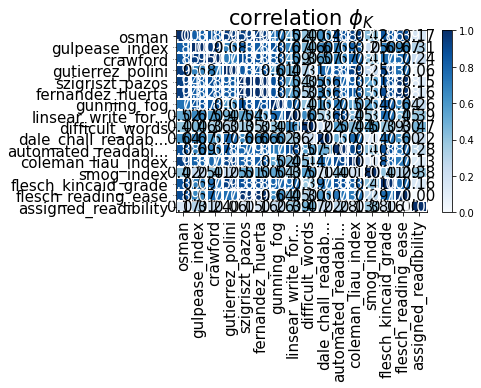

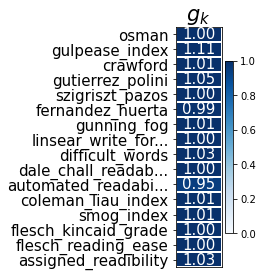

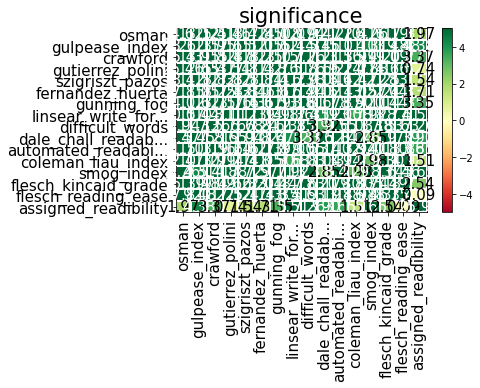

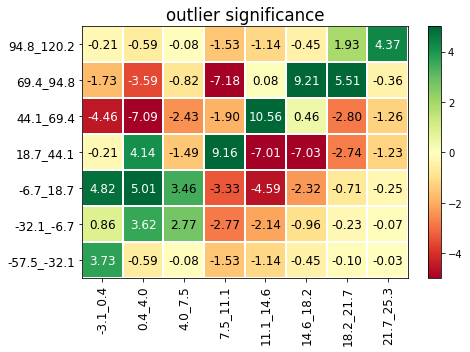

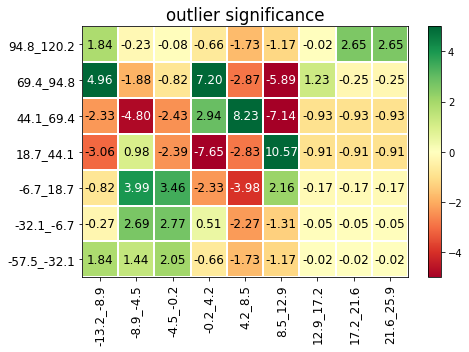

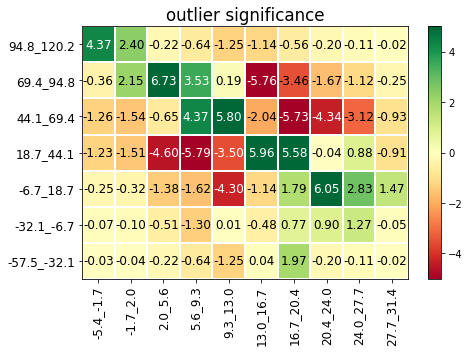

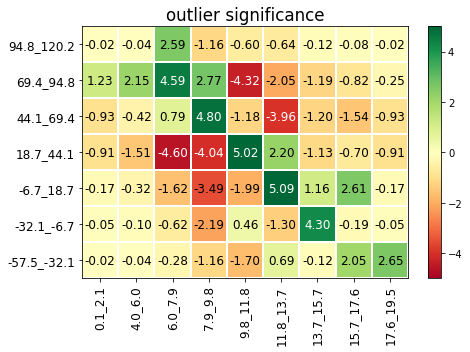

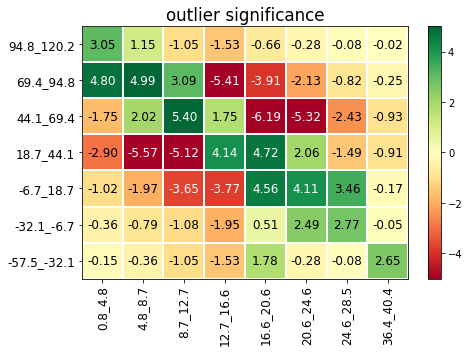

/usr/local/lib/python3.7/dist-packages/phik/outliers.py:200: RuntimeWarning: invalid value encountered in double_scalars
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))


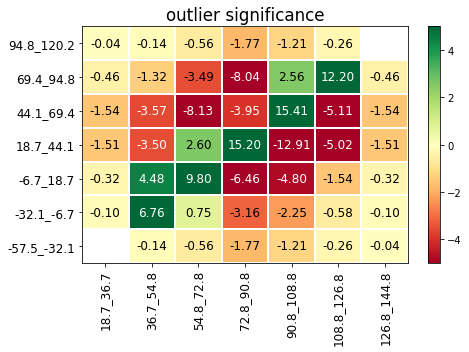

/usr/local/lib/python3.7/dist-packages/phik/outliers.py:200: RuntimeWarning: invalid value encountered in double_scalars
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))


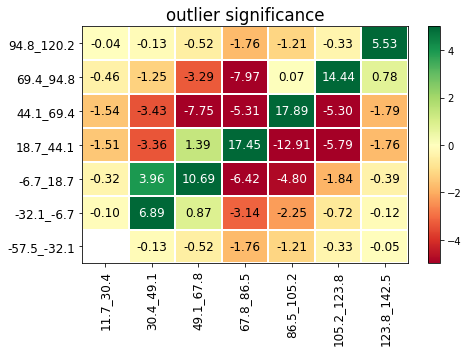

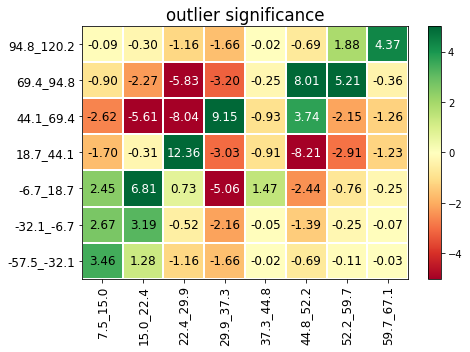

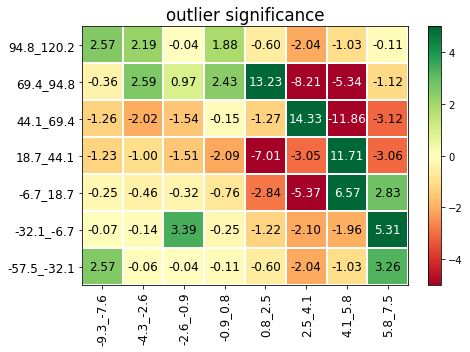

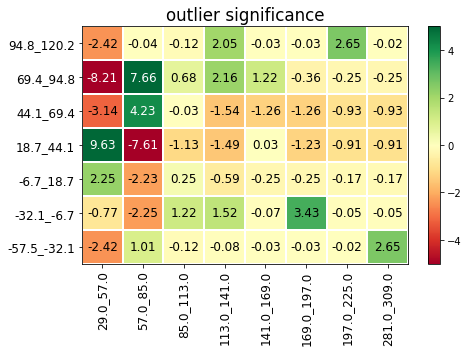

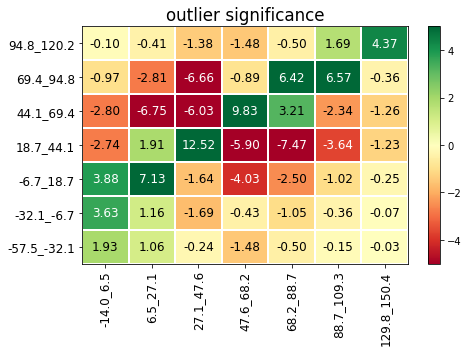

/usr/local/lib/python3.7/dist-packages/phik/outliers.py:200: RuntimeWarning: invalid value encountered in double_scalars
  logmidp = np.log(0.5) + lp + np.log(1 + np.exp(lp1 - lp))


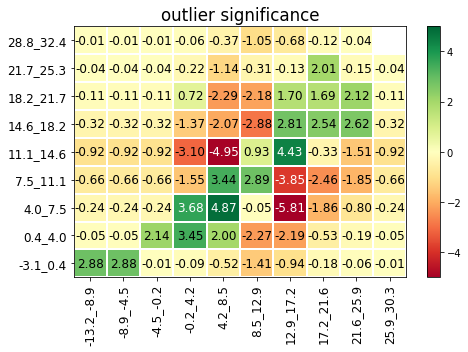

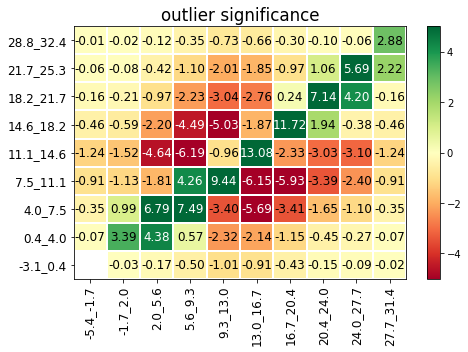

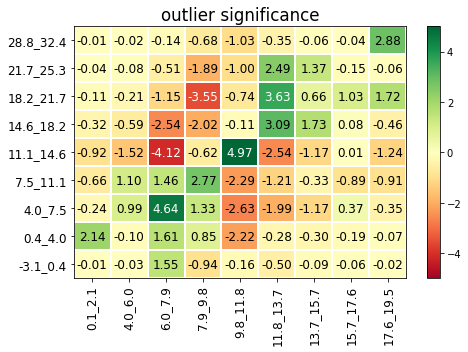

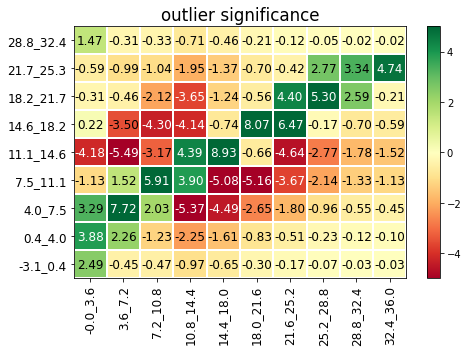

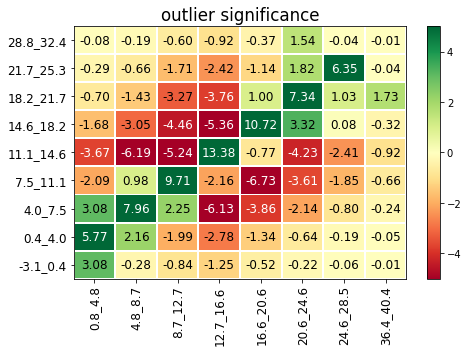

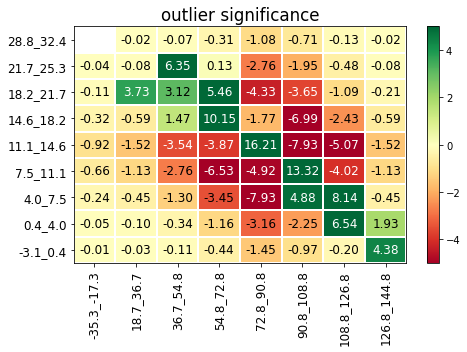

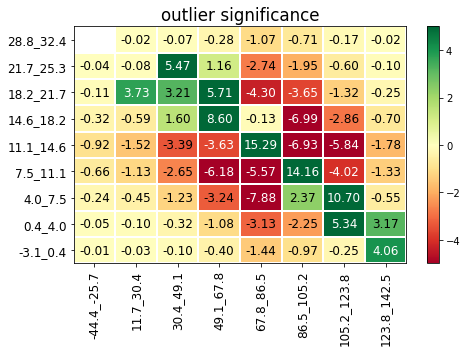

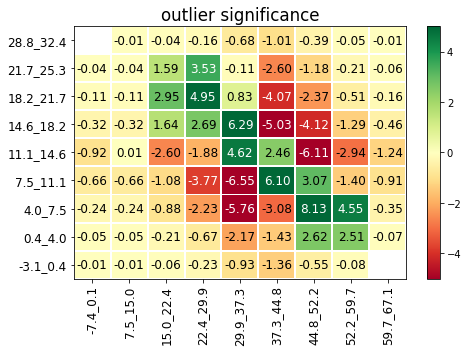

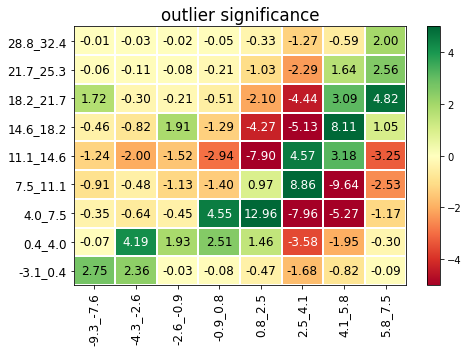

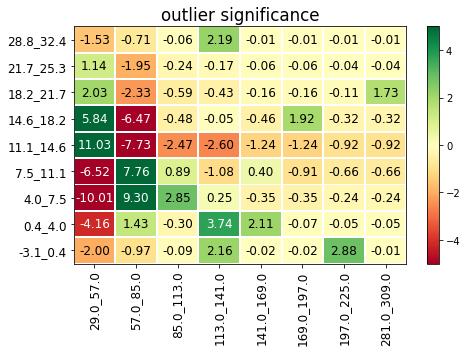

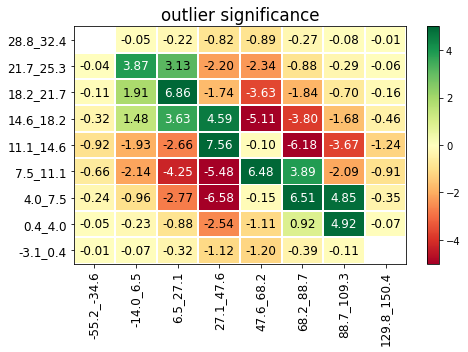

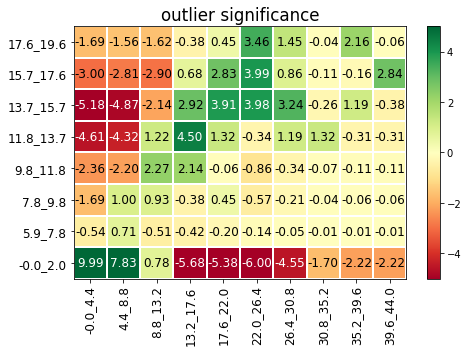

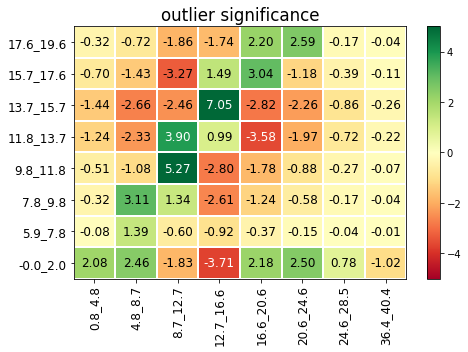

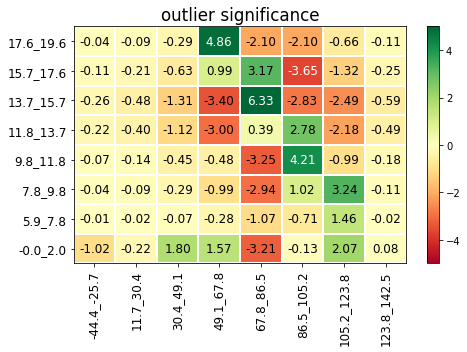

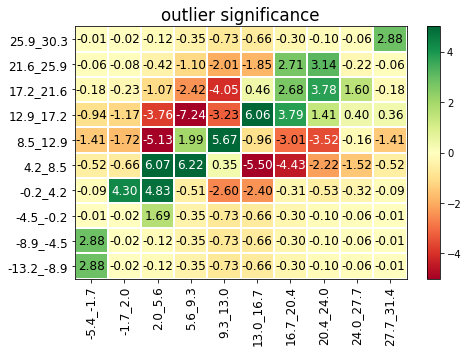

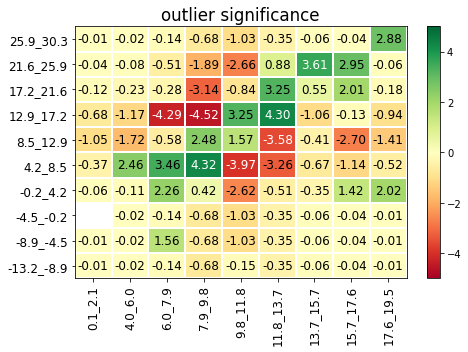

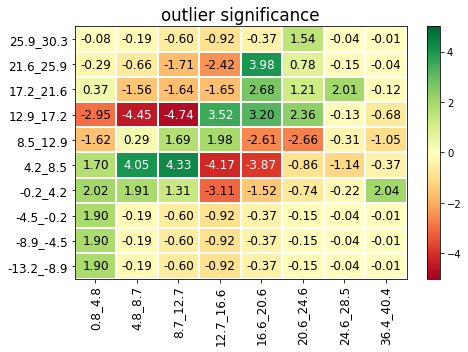

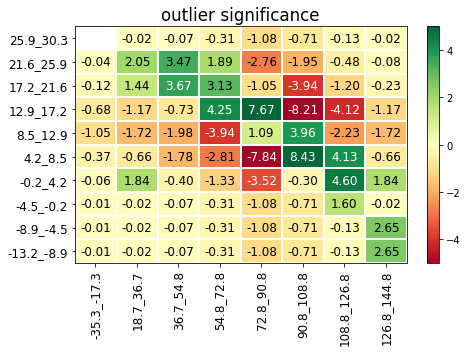

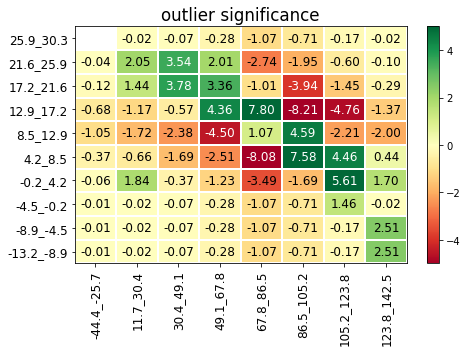

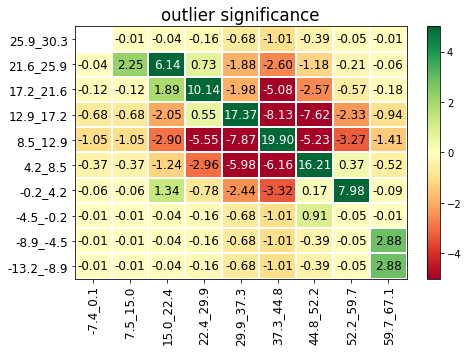

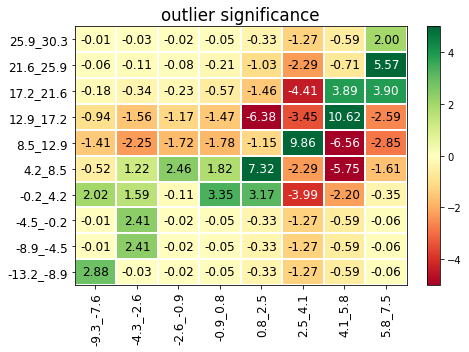

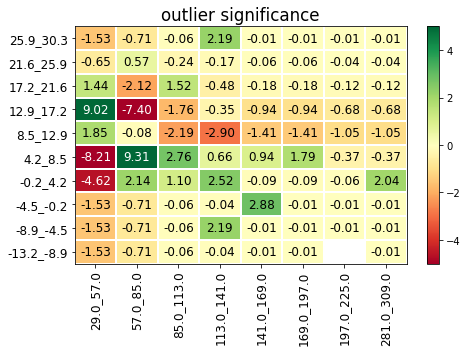

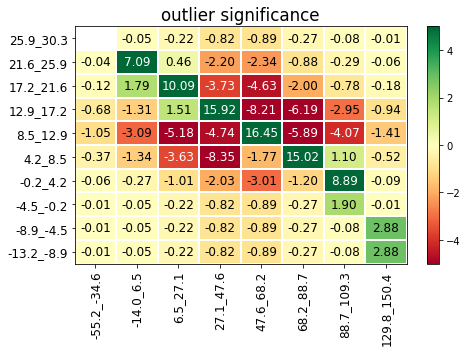

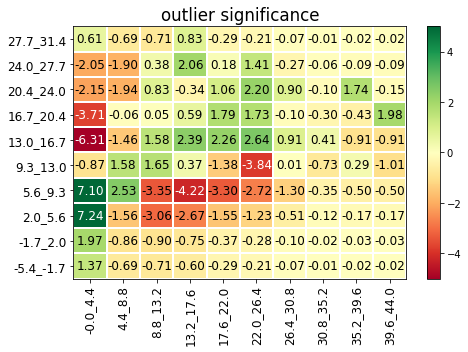

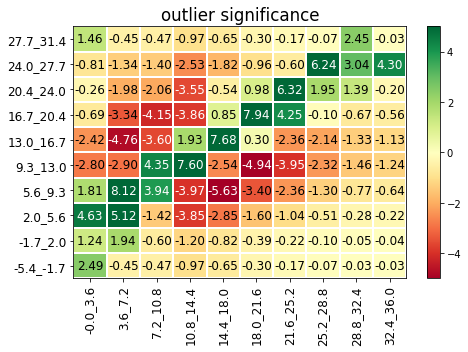

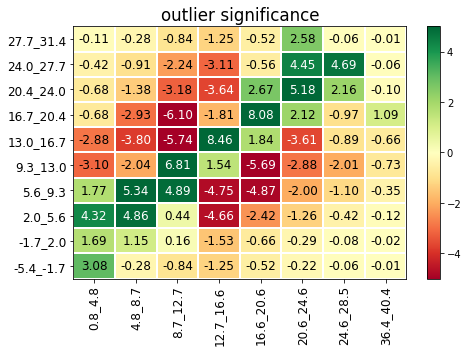

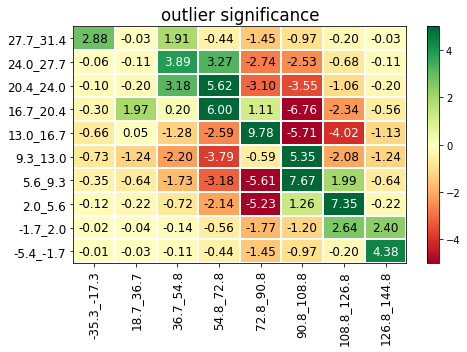

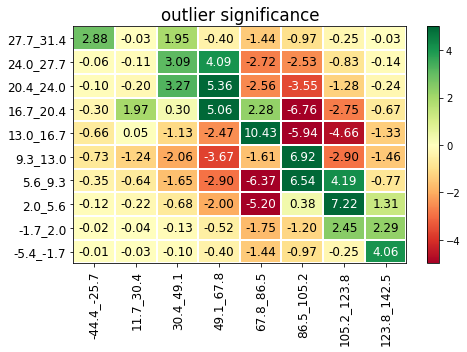

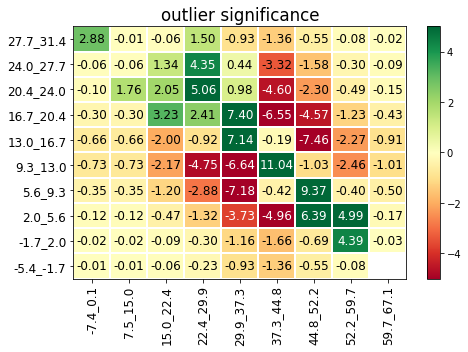

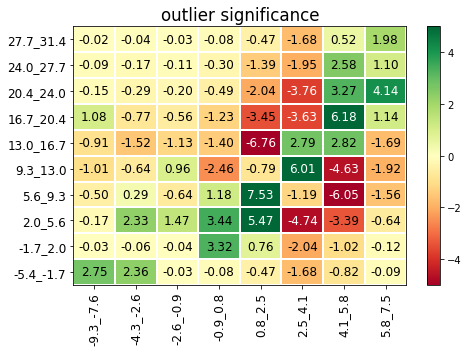

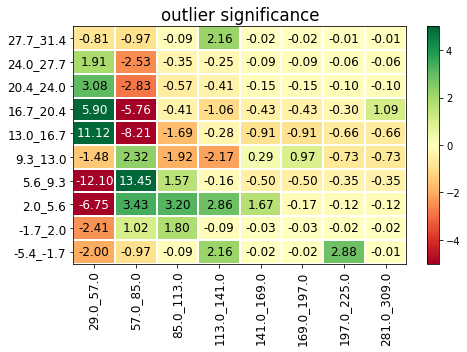

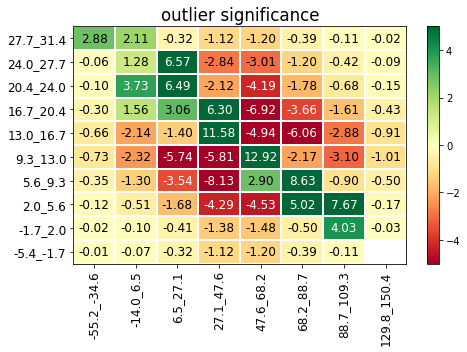

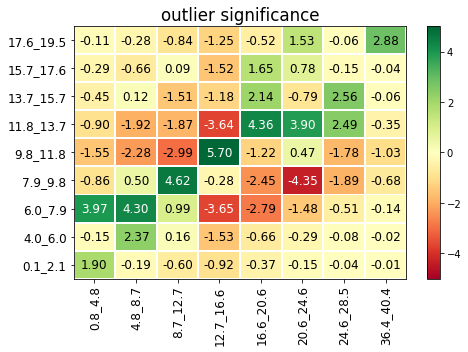

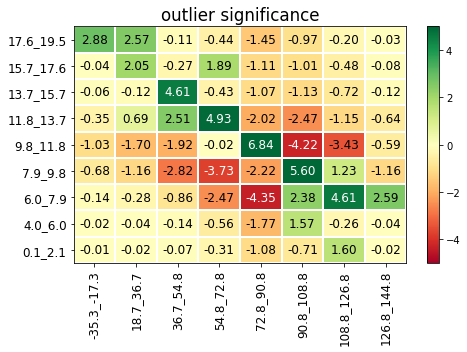

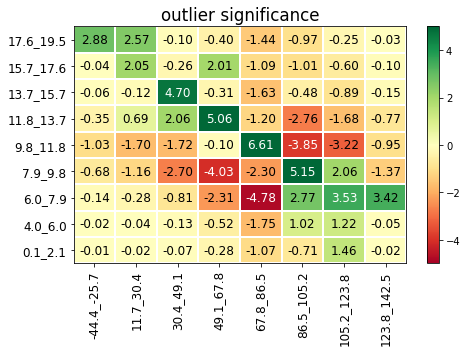

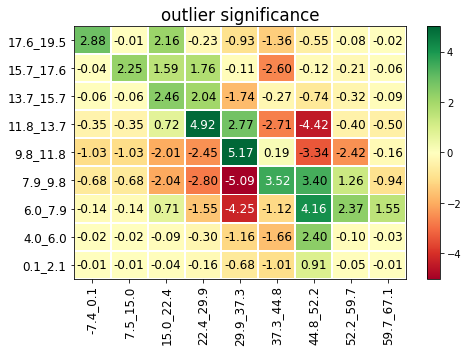

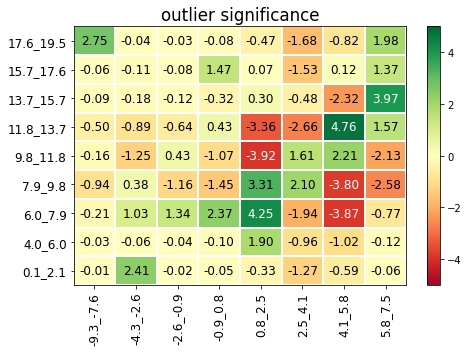

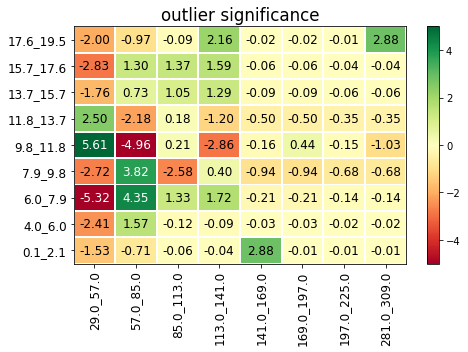

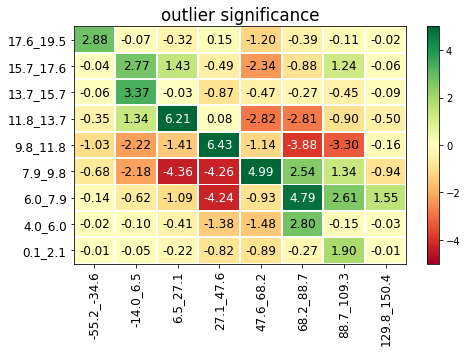

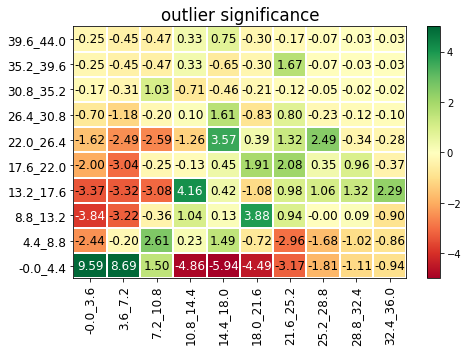

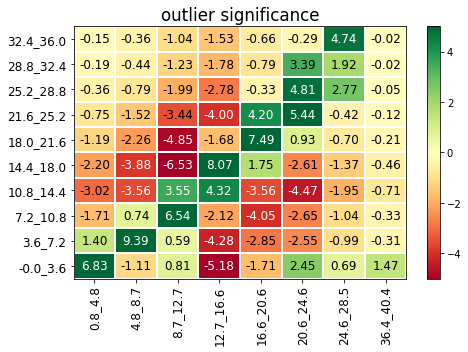

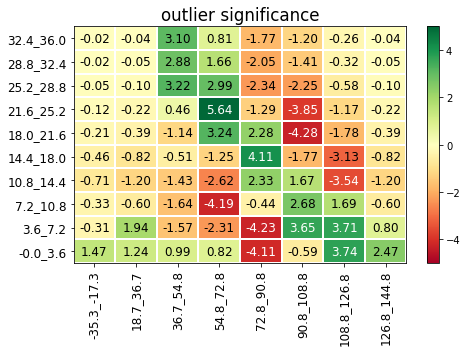

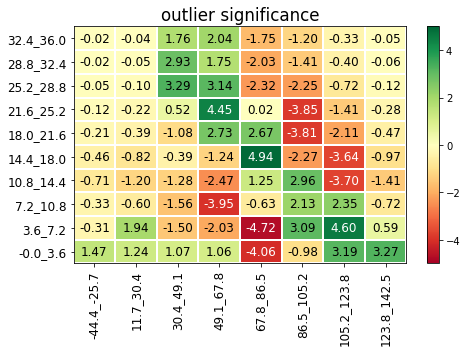

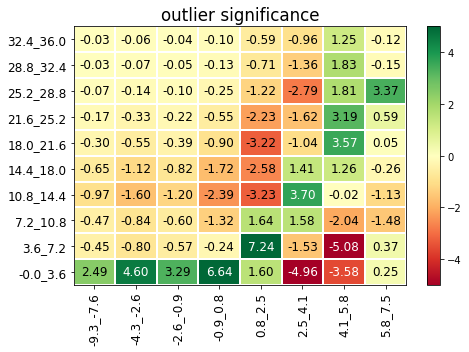

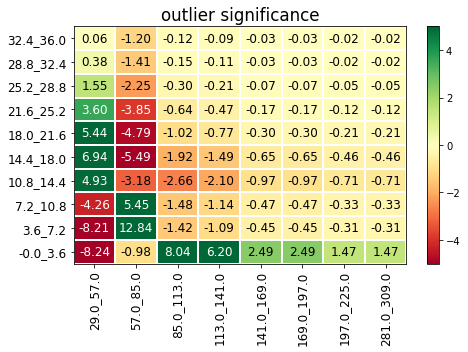

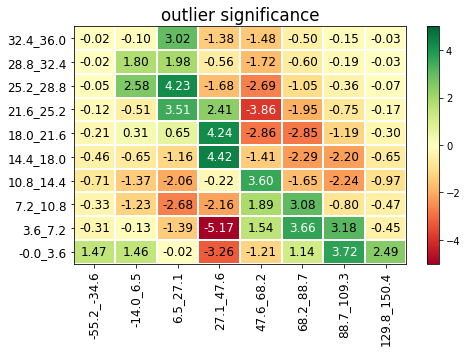

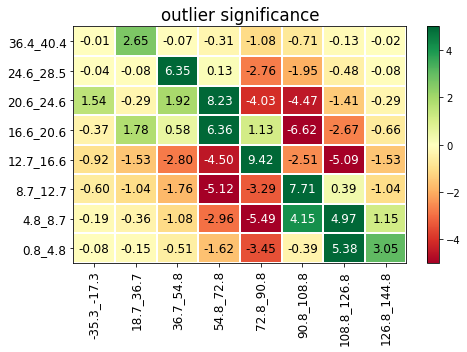

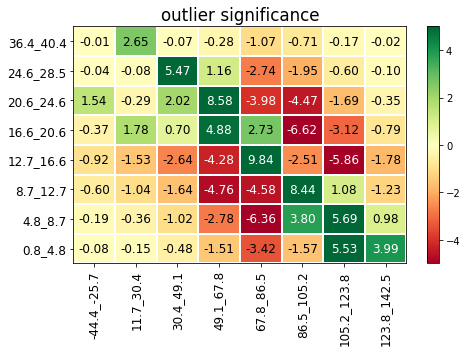

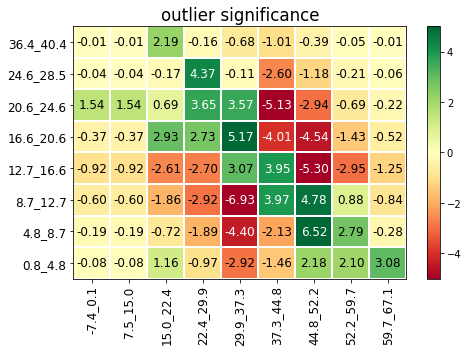

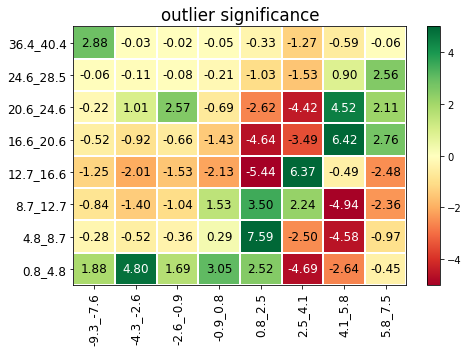

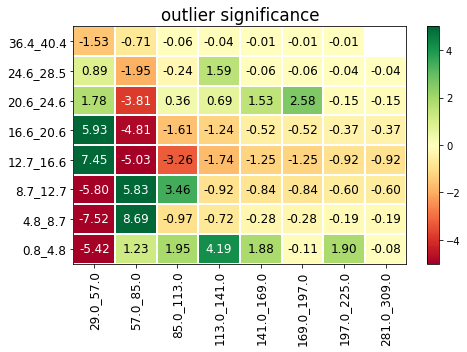

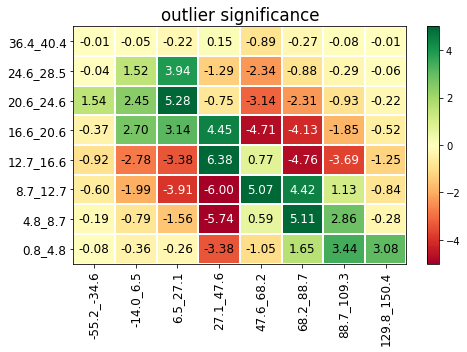

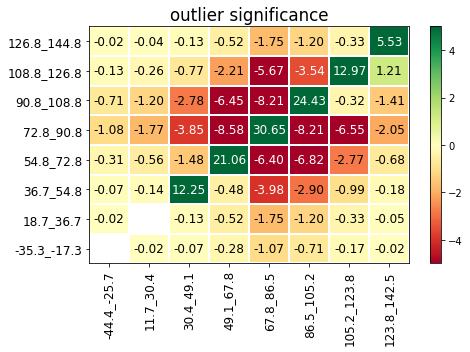

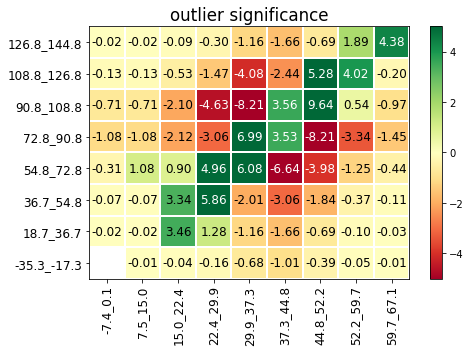

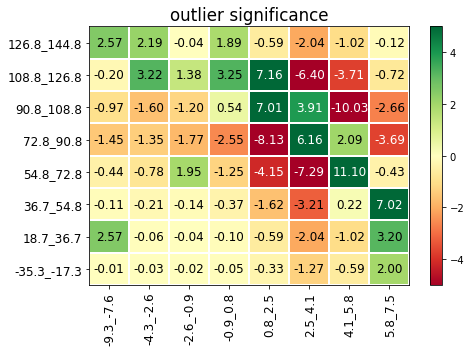

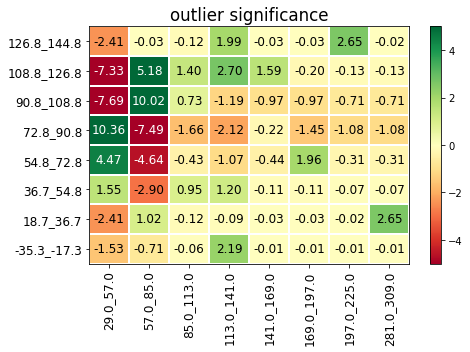

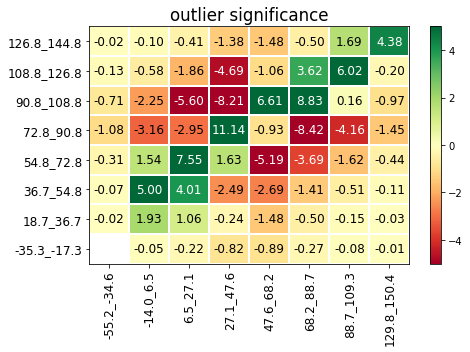

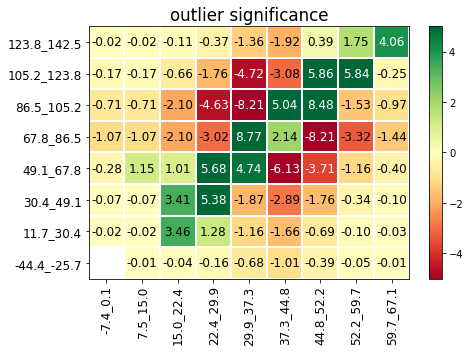

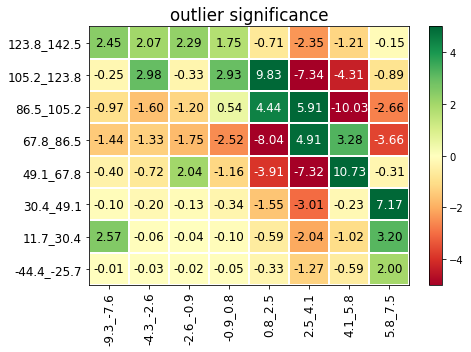

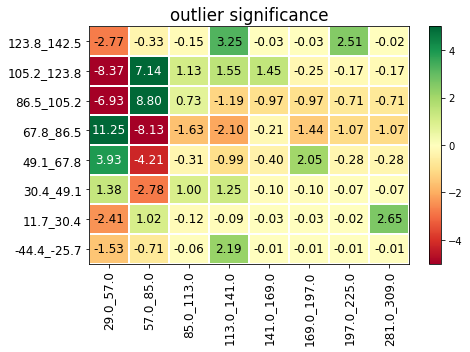

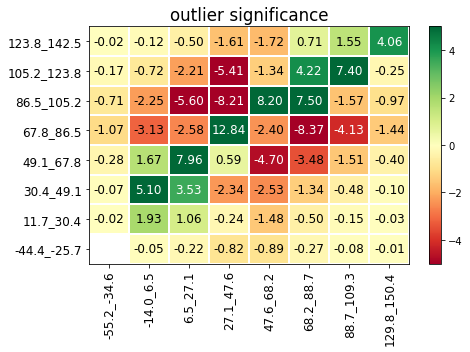

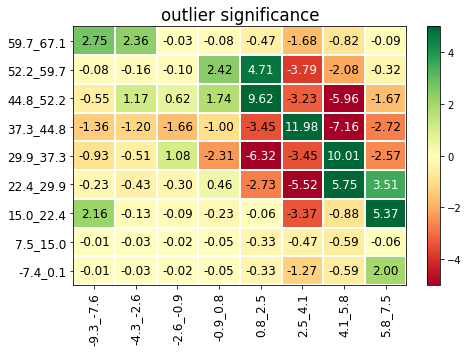

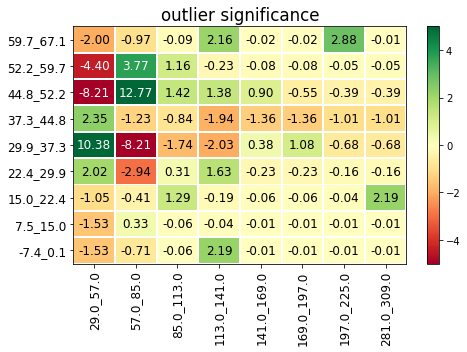

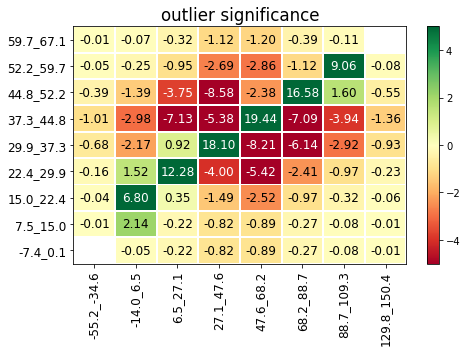

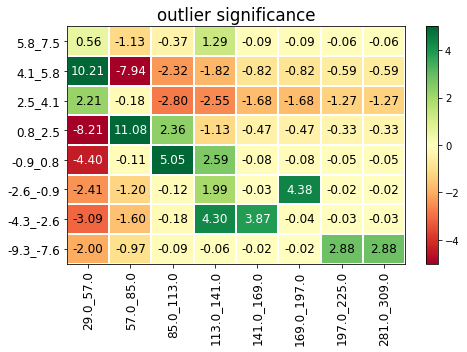

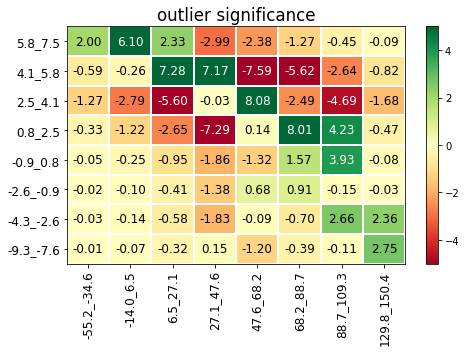

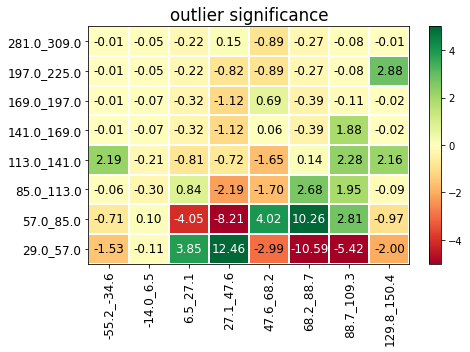

(                              assigned_readibility  ...     osman
 assigned_readibility                      1.000000  ...  0.173316
 flesch_reading_ease                       0.000000  ...  0.892146
 flesch_kincaid_grade                      0.160109  ...  0.862325
 smog_index                                0.383352  ...  0.417154
 coleman_liau_index                        0.133526  ...  0.934164
 automated_readability_index               0.275697  ...  0.878711
 dale_chall_readability_score              0.215652  ...  0.639406
 difficult_words                           0.469471  ...  0.402804
 linsear_write_formula                     0.385076  ...  0.522121
 gunning_fog                               0.259071  ...  0.739938
 fernandez_huerta                          0.159071  ...  0.941636
 szigriszt_pazos                           0.147178  ...  0.939153
 gutierrez_polini                          0.056996  ...  0.945416
 crawford                                  0.241805  ...  0.85

In [28]:
report.correlation_report(data[numeric_columns], pdf_file_name='phik_correlation_report.pdf')

In [29]:
!pip install minepy

     |████████████████████████████████| 495 kB 5.3 MB/s 
  Created wheel for minepy: filename=minepy-1.2.5-cp37-cp37m-linux_x86_64.whl size=177538 sha256=5973db3d4c86166e5ee9b9f97c4a343846765189418163e751ef622ec4112b4e
  Stored in directory: /root/.cache/pip/wheels/d1/ea/d7/fabbfa6e294adcbc43dabca0e0158dafdd36051246992c7311
Successfully built minepy


In [30]:
from minepy import MINE
mine = MINE()
for col in ['flesch_reading_ease', 'flesch_kincaid_grade', 'smog_index',
       'coleman_liau_index', 'automated_readability_index',
       'dale_chall_readability_score', 'difficult_words',
       'linsear_write_formula', 'gunning_fog',
       'fernandez_huerta', 'szigriszt_pazos', 'gutierrez_polini', 'crawford',
       'gulpease_index', 'osman']:
  mine.compute_score(data[col].values, data['assigned_readibility'].values)
  print(col,mine.mic())

flesch_reading_ease 0.17493548118259442
flesch_kincaid_grade 0.12934864959169026
smog_index 0.11227387036227188
coleman_liau_index 0.14153150143839416
automated_readability_index 0.13490449356004253
dale_chall_readability_score 0.17382236600497106
difficult_words 0.14934947474830387
linsear_write_formula 0.18873398439912922
gunning_fog 0.19723059691143546
fernandez_huerta 0.161335382456164
szigriszt_pazos 0.17688093385467238
gutierrez_polini 0.15643283356120055
crawford 0.1105880093981384
gulpease_index 0.19618435353791763
osman 0.15307860607418441


In [31]:
for col in numeric_columns:
  auroc = roc_auc_score(data['assigned_readibility'].values, data[col].values)
  print(col,auroc,"\n")

assigned_readibility 1.0 

flesch_reading_ease 0.4742383838383838 

flesch_kincaid_grade 0.595579797979798 

smog_index 0.6425858585858586 

coleman_liau_index 0.5507474747474748 

automated_readability_index 0.6174949494949494 

dale_chall_readability_score 0.4292929292929292 

difficult_words 0.7160404040404041 

linsear_write_formula 0.643539393939394 

gunning_fog 0.5650343434343434 

fernandez_huerta 0.452840404040404 

szigriszt_pazos 0.4551434343434344 

gutierrez_polini 0.44728888888888885 

crawford 0.5692525252525251 

gulpease_index 0.3616242424242424 

osman 0.4249858585858586 



In [32]:
features = ['definitions']
Y = data['assigned_readibility']

In [33]:
import numpy as np
np.random.seed(0)
msk = np.random.rand(len(data)) < 0.8
df = data[msk]
df = df.reset_index().copy()
val_df = data[~msk]
val_df = val_df.reset_index().copy()

In [34]:
for col in numeric_columns:
  auroc = roc_auc_score(val_df['assigned_readibility'].values, val_df[col].values)
  print(col,auroc,"\n")

assigned_readibility 1.0 

flesch_reading_ease 0.4964360587002097 

flesch_kincaid_grade 0.5010482180293501 

smog_index 0.6874213836477988 

coleman_liau_index 0.5379454926624738 

automated_readability_index 0.539412997903564 

dale_chall_readability_score 0.39853249475890984 

difficult_words 0.6587002096436059 

linsear_write_formula 0.49433962264150944 

gunning_fog 0.46729559748427674 

fernandez_huerta 0.5025157232704403 

szigriszt_pazos 0.5020964360587002 

gutierrez_polini 0.48092243186582817 

crawford 0.5316561844863732 

gulpease_index 0.46457023060796643 

osman 0.4561844863731656 



# Feature extraction: TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [36]:
tfidf_model_original = TfidfVectorizer(
    ngram_range=(1, 4), min_df=0.0005, stop_words="english"
)

tfidf_model_original.fit(df["definitions"])

TfidfVectorizer(min_df=0.0005, ngram_range=(1, 4), stop_words='english')

In [37]:
tfidf_df_train_original = pd.DataFrame(
    tfidf_model_original.transform(df["definitions"]).todense()
)
tfidf_df_train_original.columns = sorted(tfidf_model_original.vocabulary_)

# validation
tfidf_df_valid_original = pd.DataFrame(
    tfidf_model_original.transform(val_df["definitions"]).todense()
)
tfidf_df_valid_original.columns = sorted(tfidf_model_original.vocabulary_)


In [38]:
tfidf_df_train_original

000  000 help  ...  σ2 εj residual  σ2 εj residual variance
0    0.0       0.0  ...             0.0                      0.0
1    0.0       0.0  ...             0.0                      0.0
2    0.0       0.0  ...             0.0                      0.0
3    0.0       0.0  ...             0.0                      0.0
4    0.0       0.0  ...             0.0                      0.0
..   ...       ...  ...             ...                      ...
397  0.0       0.0  ...             0.0                      0.0
398  0.0       0.0  ...             0.0                      0.0
399  0.0       0.0  ...             0.0                      0.0
400  0.0       0.0  ...             0.0                      0.0
401  0.0       0.0  ...             0.0                      0.0

[402 rows x 26355 columns]

In [39]:
tfidf_df_valid_original

000  000 help  ...  σ2 εj residual  σ2 εj residual variance
0   0.0       0.0  ...             0.0                      0.0
1   0.0       0.0  ...             0.0                      0.0
2   0.0       0.0  ...             0.0                      0.0
3   0.0       0.0  ...             0.0                      0.0
4   0.0       0.0  ...             0.0                      0.0
..  ...       ...  ...             ...                      ...
93  0.0       0.0  ...             0.0                      0.0
94  0.0       0.0  ...             0.0                      0.0
95  0.0       0.0  ...             0.0                      0.0
96  0.0       0.0  ...             0.0                      0.0
97  0.0       0.0  ...             0.0                      0.0

[98 rows x 26355 columns]

# Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [41]:
train_X = tfidf_df_train_original
train_y = df['assigned_readibility']
valid_X = tfidf_df_valid_original
valid_y = val_df['assigned_readibility']


In [42]:
def model(clf, train_X, train_y, valid_X, valid_y):
    clf.fit(train_X, train_y)
    pred_tr = clf.predict(train_X)
    pred_valid = clf.predict(valid_X)
    pred_tr_prob = clf.predict_proba(train_X)[:,1]
    pred_valid_prob = clf.predict_proba(valid_X)[:,1]
    print("\nTraining F1:{}".format(f1_score(train_y, pred_tr, average="weighted")))
    print("Training Confusion Matrix \n{}".format(confusion_matrix(train_y, pred_tr)))
    print("Classification Report Train: \n{}".format(classification_report(train_y, pred_tr)))
    print("AUC Train", roc_auc_score(train_y, pred_tr_prob))

    print(
        "\nValidation F1:{}".format(f1_score(valid_y, pred_valid, average="weighted"))
    )
    print(
        "Validation Confusion Matrix \n{}".format(confusion_matrix(valid_y, pred_valid))
    )
    print(
        "Classification Report: \n{}".format(classification_report(valid_y, pred_valid))
    )
    print("AUC Valid", roc_auc_score(valid_y, pred_valid_prob))

In [43]:
lr_clf = LogisticRegression(solver="lbfgs", n_jobs=-1)
model(lr_clf, train_X, train_y, valid_X, valid_y)
params = lr_clf.get_params()
print(params)


Training F1:0.9975117682533469
Training Confusion Matrix 
[[179   1]
 [  0 222]]
Classification Report Train: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       180
           1       1.00      1.00      1.00       222

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402

AUC Train 0.9999874874874876

Validation F1:0.521727280655852
Validation Confusion Matrix 
[[ 7 38]
 [ 0 53]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.16      0.27        45
           1       0.58      1.00      0.74        53

    accuracy                           0.61        98
   macro avg       0.79      0.58      0.50        98
weighted avg       0.77      0.61      0.52        98

AUC Valid 0.7295597484276729
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 

In [44]:
pickle.dump(lr_clf, open("lr_clf.pickle","wb"))